<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana6/CuadraturaGaussiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math
sym.init_printing(use_unicode=True)

In [26]:
w0 = np.array([1,1])
x0 = np.array([-1/np.sqrt(3),1/np.sqrt(3)])

In [27]:
f = lambda x: 1/np.cos(x)

In [28]:
I = np.sum(w0*f(x0))
print(I)

2.386885987159041


In [29]:
np.log(1/np.cos(1)+np.tan(1)) - np.log(1/np.cos(-1)+np.tan(-1))

np.float64(2.452382341767035)

In [30]:
Roots, Weights = np.polynomial.legendre.leggauss(10)
#print(Roots, Weights)

In [31]:
I = np.sum(Weights*f(Roots))
print(I)

2.4523823360949986


In [ ]:
def GetNewtonMethod(f,df,xn,itmax=100,precision=1e-14):

  error = 1
  it = 0

  while error > precision and it < itmax:

    try:
      dfxn = df(xn)
      if np.abs(dfxn) < 1e-16:
        return False

      xn1 = xn - f(xn)/dfxn
      error = np.abs(xn1-xn)
    except ZeroDivisionError:
      print('Division por error')
      return False

    xn = xn1
    it += 1

  if it == itmax:
    return False
  else:
    return xn

In [ ]:
def GetRoots(f, df, x, atol=1e-9, max_iter = 100, precision = 1e-14):

  Roots = np.array([])

  for x0 in x:
    #print(x)
    root = GetNewtonMethod(f,df,x0,max_iter,precision)
    #print(x0)
    if root is not False:

      if not any(np.isclose(root, r, atol=atol) for r in Roots):
        print('New root found', root)
        Roots = np.append(Roots,root)

  Roots.sort()

  return Roots

In [ ]:
f = lambda x: x**3 - 4*x**2 + 1
df = lambda x,h=1e-6: (f(x+h) - f(x-h))/(2*h)

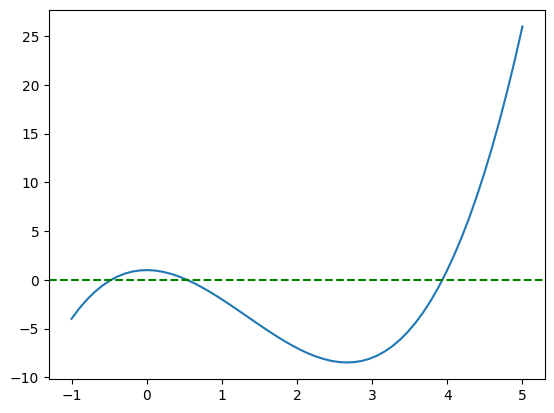

In [ ]:
xn = np.linspace(-1,5,60)
plt.plot(xn,f(xn))
plt.axhline(0,ls='--',c='g')

In [ ]:
xn = np.linspace(-1,5,10)
GetRoots(f,df,xn)

New root found -0.4728339089952555
New root found 0.5374015770252258
New root found 3.9354323319700297


array([-0.47283391,  0.53740158,  3.93543233])